# 1 柱形图

seaborn相比较matplotlib而言，画图更加简单了，但是代价就是灵活度没有那么高。不过要谨记的就是，seaborn是matplotlib的拓展，而不是替代。

下面就对不同类型的图进行参数的调整，来看看可以有些什么变化。

seaborn中自带了几个经典数据集，包括了titanic，iris等，用load_dataset就可以加载[这个网页上的](https://github.com/mwaskom/seaborn-data)列出的数据集。

下面我们将针对数据集进行更多的图像绘制和分析。

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

titanic=sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


首先简单介绍这个数据集，titanic是泰坦尼克号的成员名单，数据集中共有15个字段，Survived：乘客是否遇难，Pclass：乘客所在的船舱等级；Sex：乘客性别，Age：乘客年龄，SibSp：乘客的兄弟姐妹和配偶数量，Parch：乘客的父母与子女数量，Fare：票价，Embarked：乘客登船码头，adult_male：是否成年男性，deck：灾难发生时是否在甲板上，embark_town：登船地点，alive：是否还活着，alone：是否独自出行


首先看看船舱等级和是否幸存的关系。

d:\Users\i9233\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


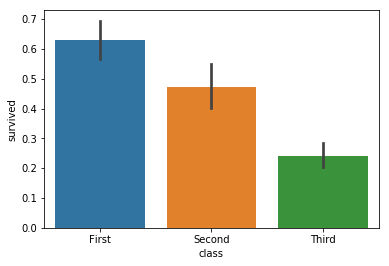

In [2]:
sns.barplot(x='class',y='survived',data=titanic)

barplot默认画的y轴是平均数，这里survived只有0和1，所以就直接代表了幸存率，如果想看幸存者数量，可以用countplot。

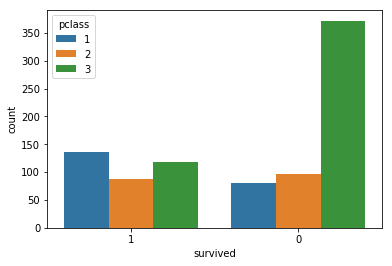

In [3]:
sns.countplot(x='survived', hue= 'pclass',data=titanic, order=[1, 0])

hue参数可以把一列分成几列，order对顺序进行排列。

可以看出，1等舱的人生存率和生存数都是最高的。

同样我们可以看看性别对生存的影响。

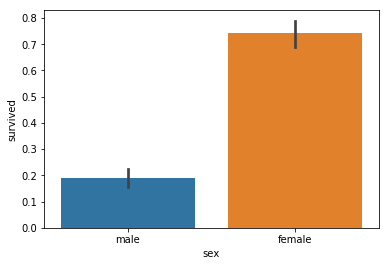

In [4]:
sns.barplot(x='sex',y='survived',data=titanic)

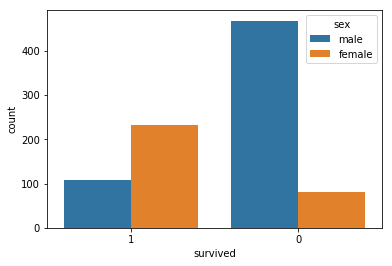

In [5]:
sns.countplot(x='survived', hue= 'sex',data=titanic, order=[1, 0])

这里可以看出，男性死亡人数和死亡率都更高。但是在之前的统计中，头等舱的人更多生存下来，看起来人性并没有那么高尚才对，为什么在男女上会出现这么高尚的情况呢？

我们看看女性大都坐在什么舱位里面。

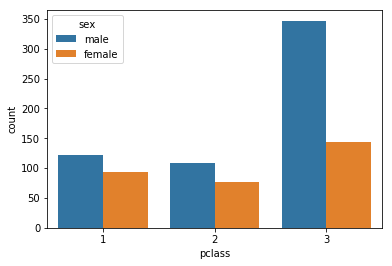

In [6]:
sns.countplot(x='pclass',hue='sex',data=titanic)

可以看出原来男性大都是坐在三等舱，而女性则比较平均。

这不得不为我们“女士优先”原则提出质疑，到底他们有没有为女性和年幼的人让出自己宝贵的机会呢？

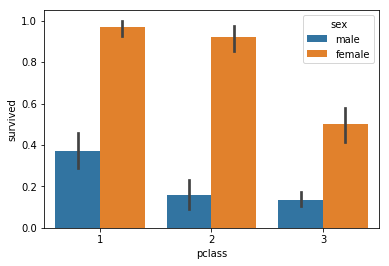

In [7]:
sns.barplot(x='pclass',y='survived',hue='sex',data=titanic,order=[1,2,3])

这是三种舱的男女各自的存活率，可以看见男性明显低于女性。

看起来还是很高尚的，那为什么有钱人能比没钱的人更容易生存呢？有可能是舱位更好则视野更开阔，也分布得更稀疏，离甲板也更近，有更优越的逃生条件。更多的分析这里就不介绍了。

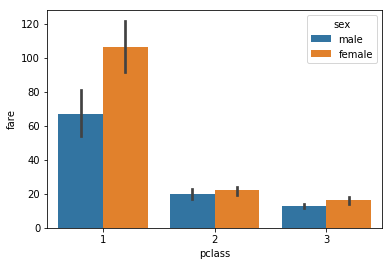

In [8]:
sns.barplot(x='pclass',y='fare',hue='sex',data=titanic,order=[1,2,3])

三种不同的价格，决定了不同的生存几率，恐怕是遇难者们没有想象到的结果。

# 2 小提琴图

小提琴图其实是箱线图与核密度图的结合，箱线图展示了分位数的位置，小提琴图则展示了任意位置的密度，通过小提琴图可以知道哪些位置的密度较高。

在图中，白点是中位数，黑色盒型的范围是下四分位点到上四分位点，细黑线表示须。外部形状即为核密度估计。

与箱线图进行对比，同样以'titanic'数据集为例，我们来探索不同的'class'（船舱）下乘客的'age'（年龄）情况。


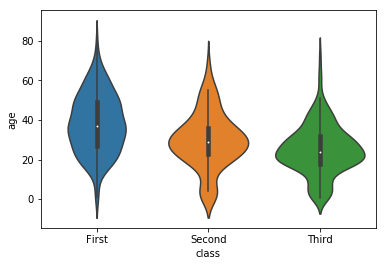

In [9]:
sns.violinplot(x='class',y='age',data=titanic)

同样，可以设置'hue'参数，对字段进行细分。



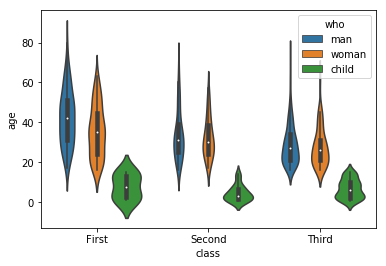

In [10]:
sns.violinplot(x='class',y='age',hue='who',data=titanic)

当hue参数只有两个取值时，也可以通过设置'split'参数为True，“拆分”小提琴，提琴两边分别表示两个分类的情况，这样可以更有效地利用空间。

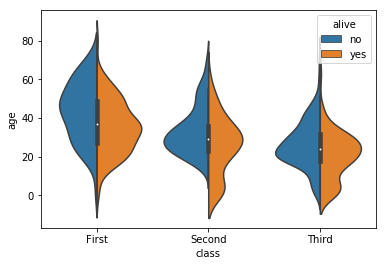

In [11]:
sns.violinplot(x='class',y='age',hue='alive',data=titanic,split=True)

我们可以在小提琴内部添加图形来帮助我们进行分析，这里就需要控制'inner'参数。



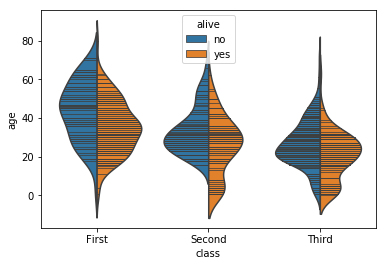

In [12]:
sns.violinplot(x='class',y='age',hue='alive',data=titanic,split=True,inner='stick')

我们甚至可以把散点图加入小提琴图中。

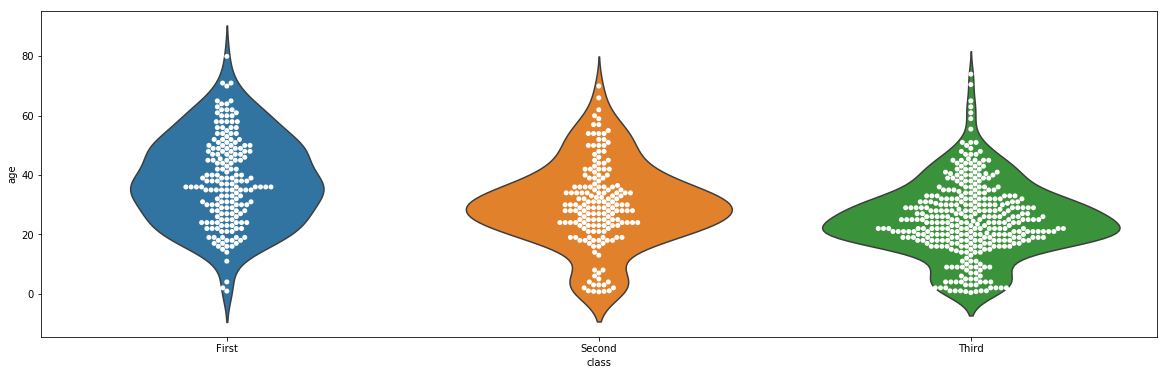

In [13]:
plt.figure(figsize=(20,6))
sns.violinplot(x='class',y='age',data=titanic,inner=None)
sns.swarmplot(x='class',y='age',data=titanic,color='white')

# 3 直方图

通常我们在分析一组数据时，首先要看的就是变量的分布规律，而直方图则提供了简单快速的方式，在 Seaborn 中可以用 distplot() 实现。

我们对'age'进行直方图展示。但在绘图之前，我们观测到'age'字段中存在缺失值，需要先用 dropna() 方法删掉存在缺失值的数据，否则无法绘制出图形。

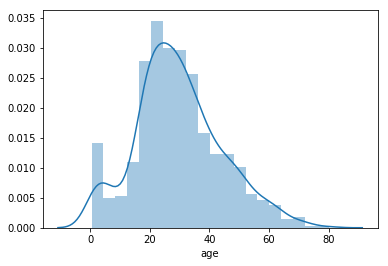

In [14]:
age1=titanic['age'].dropna()
sns.distplot(age1)

在上图中，矩形表示在不同年龄段的数量分布，并且 distplot() 默认拟合出了密度曲线，可以看出分布的变化规律。

同时我们可以调节其中的一些参数，来控制输出的图形。

'kde' 是控制密度估计曲线的参数，默认为 True，不设置会默认显示，如果我们将其设为 False，则不显示密度曲线。


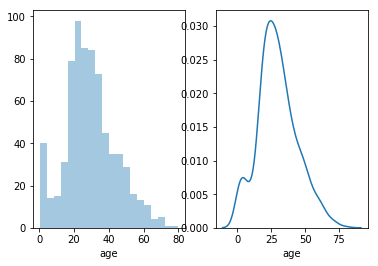

In [15]:
#创建一个一行2列的画布,主要方便对比
fig,axes=plt.subplots(1,2)

#需要用axes[]表示是第几张图，从0开始
sns.distplot(age1,kde=False, ax=axes[0])
sns.distplot(age1, hist=False, ax=axes[1])

'bins'是控制分布矩形数量的参数，通常我们可以增加其数量，来看到更为丰富的信息。



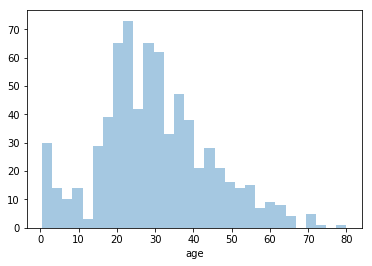

In [16]:
sns.distplot(age1,bins=30,kde=False)


'reg' 参数用于控制直方图中的边际毛毯，通过控制'reg'是实现毛毯是否显示。



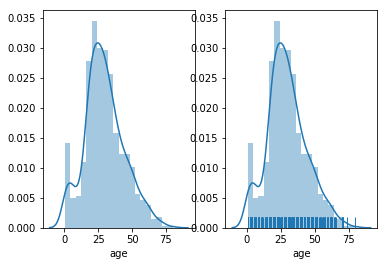

In [17]:
#创建一个一行2列的画布,主要方便对比
fig,axes=plt.subplots(1,2)

#设置'reg'参数，加上观测数值的边际毛毯
#需要用axes[]表示是第几张图，从0开始
sns.distplot(age1,ax=axes[0]) #左图
sns.distplot(age1,rug=True,ax=axes[1]) #右图